In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


C:\Users\ALNOUR\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read data set and save it in data frame

In [2]:
titanic_data=pd.read_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set 1 Titanic\train.csv")
df=titanic_data.copy()
test=pd.read_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set 1 Titanic\test.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## First i will split data to train and validation set

In [3]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=.2,random_state=0)

train_x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
817,818,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
378,379,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
491,492,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
192,193,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
629,630,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
559,560,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


## Some eda on train data

In [4]:
train_x.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
817,818,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
378,379,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
491,492,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S


In [5]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          571 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        163 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [6]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         2
dtype: int64

##  we can see that we have 549 value is null in cabin 
## and we have also 141 value is null in age

In [7]:
train_x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,571.000000,712.000000,712.000000,712.00000
mean,443.283708,2.317416,29.745184,0.529494,0.391854,31.86295
std,260.003783,0.833767,14.619046,1.140842,0.821368,50.13531
min,1.000000,1.000000,0.670000,0.000000,0.000000,0.00000
25%,211.750000,2.000000,20.750000,0.000000,0.000000,7.91770
50%,441.000000,3.000000,29.000000,0.000000,0.000000,14.45625
75%,671.250000,3.000000,38.000000,1.000000,0.000000,31.27500
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [8]:
train_x['Pclass'].value_counts()

3    396
1    170
2    146
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

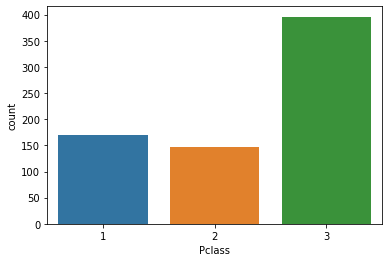

In [9]:
sns.countplot(x=train_x['Pclass'])

#### number of passangers in the lower class(3) is high(396)

In [10]:
train_x["Age"].value_counts()

24.00    23
30.00    22
36.00    21
22.00    21
18.00    20
         ..
12.00     1
34.50     1
70.50     1
7.00      1
0.67      1
Name: Age, Length: 86, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

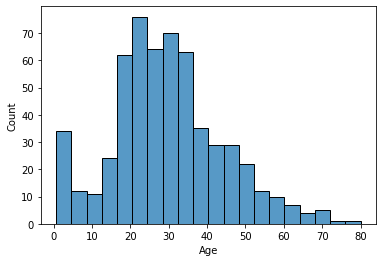

In [11]:
sns.histplot(x='Age',data=train_x)

In [12]:
train_x['SibSp'].value_counts()

0    486
1    167
2     24
4     14
3     10
8      7
5      4
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

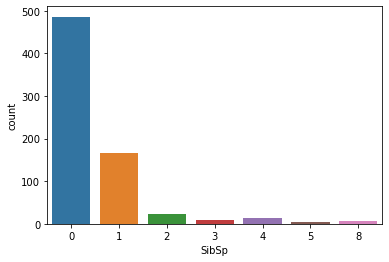

In [13]:
sns.countplot(x=train_x['SibSp'])

#### number of passengers with out any sibsp  is486 

In [14]:
train_x['Parch'].value_counts()

0    540
1     92
2     67
3      5
5      4
4      3
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

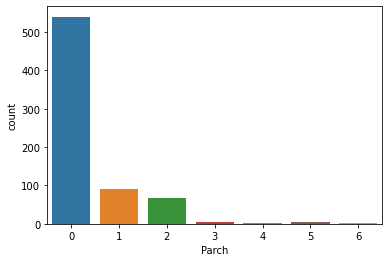

In [15]:
sns.countplot(x=train_x['Parch'])

#### number of indvidual passenges is 540 passengers with out parch(parents or children)

In [16]:
train_x['Fare'].value_counts()

13.0000    35
8.0500     33
7.8958     30
7.7500     28
26.0000    20
           ..
7.8750      1
76.2917     1
6.9500      1
7.8000      1
17.4000     1
Name: Fare, Length: 230, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

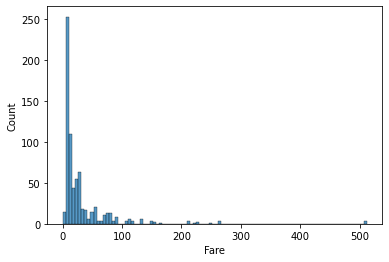

In [17]:
sns.histplot(x=train_x['Fare'])

In [18]:
train_x['Sex'].value_counts()

male      465
female    247
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

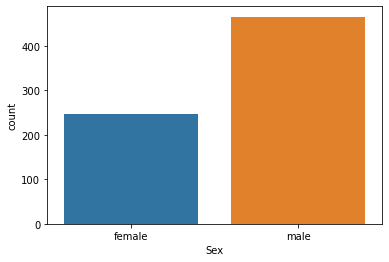

In [19]:
sns.countplot(x=train_x['Sex']) 

### number of male > number of females 

In [20]:
## let me see Embarked 
train_x["Embarked"].value_counts()

S    517
C    129
Q     64
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

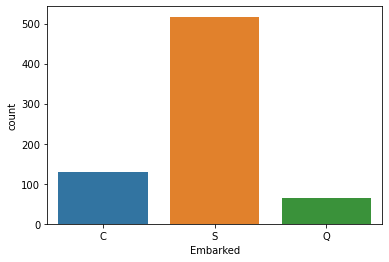

In [21]:
sns.countplot(x=train_x["Embarked"])

#### the persons aborded from Southampton is very high 517 person 

In [22]:
# let me see cabin column 
train_x['Cabin'].value_counts()

C23 C25 C27    3
G6             3
C22 C26        3
E101           3
D              3
              ..
D17            1
D50            1
A14            1
A36            1
E49            1
Name: Cabin, Length: 127, dtype: int64

In [23]:
### let me see see relation ship between each feature and  y 
train_x["Survived"]=y 
train_x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
140,141,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0
817,818,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,0
378,379,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,0
491,492,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,1
192,193,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,1
629,630,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,0
559,560,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,1


#### barchart for categoricalfeatures   to let me see what the highst surivied and what the highst died in each feature category 
#### Pclass 	Sex 	SibSp 	Parch 	Embarked 	Cabin 	

In [24]:
# function to plot barplot 
def barchart(feature):
    survived=train_x[train_x['Survived']==1][feature].value_counts()
    died=train_x[train_x['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,died])
    df.index=["Survived","Dead"]
    df.plot(kind="bar",stacked=True,figsize=(10,8))

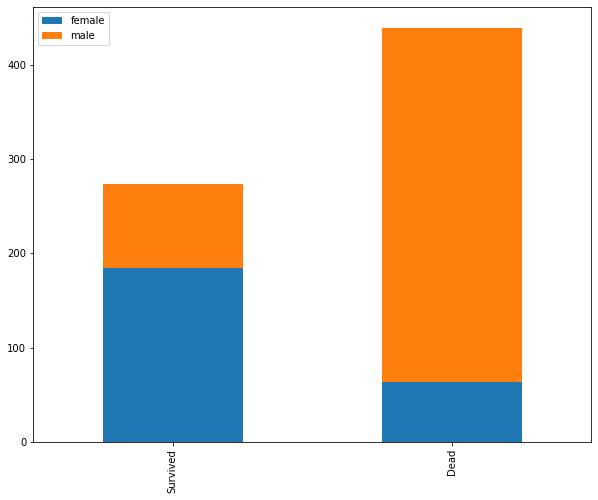

In [25]:
barchart("Sex")

#### the number of surived female> male 


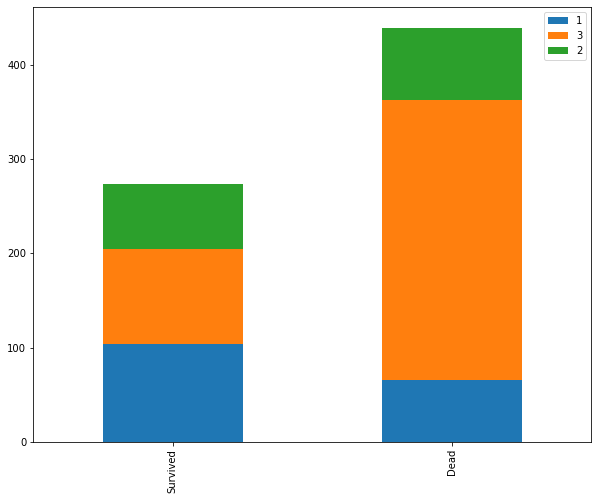

In [26]:
barchart("Pclass")

#### class 3 more likly dead than other clases beacuse they wa on the dwon 

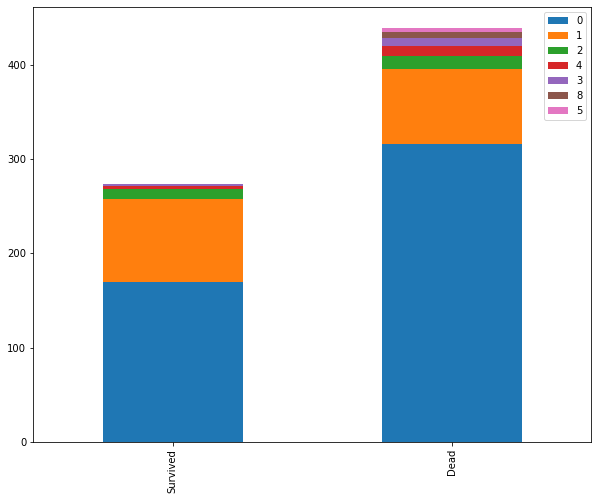

In [27]:
barchart("SibSp")

#### pepole withous any SibSp  likely dead than other 

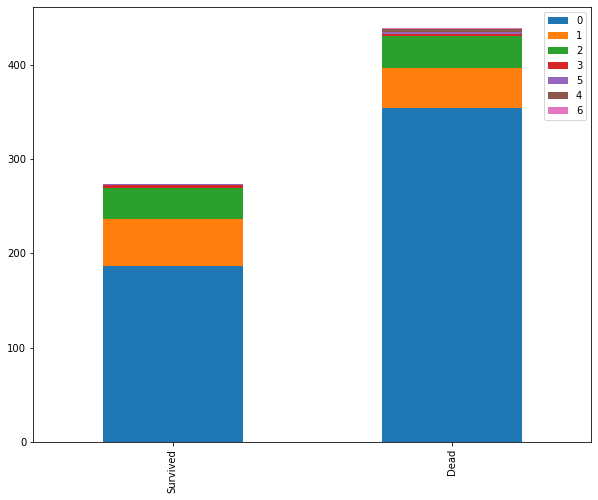

In [28]:
barchart("Parch")

####pepole withous any parch likely dead than other

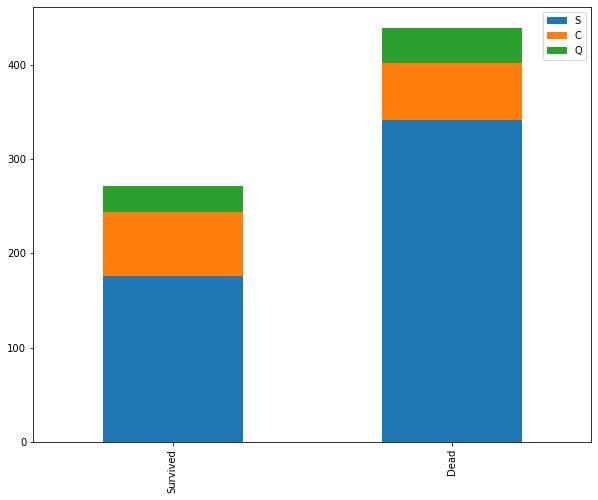

In [29]:
barchart("Embarked")

The passenger from S more likely dead

## cleaning and prepration data

In [30]:
train_x.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
140,141,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0
817,818,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,0
378,379,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,0
491,492,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S,0


In [31]:
val_x["Survived"]=val_y
val_x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
495,496,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,0
648,649,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S,0
278,279,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q,0
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
255,256,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...
780,781,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C,1
837,838,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S,0
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,1
833,834,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S,0


In [32]:
'''
# Name Column   look at value of name  contain business title  ithink business title affect on survivied
# i will extact business title  from name and put it in anew column title 
train_x["Title"]=train_x["Name"].str.extract("([A-Za-z]+)\.",expand=False)
train_x["Title"].value_counts()


val_x["Title"]=val_x["Name"].str.extract("([A-Za-z]+)\.",expand=False)

test["Title"]=test["Name"].str.extract("([A-Za-z]+)\.",expand=False)
'''

'\n# Name Column   look at value of name  contain business title  ithink business title affect on survivied\n# i will extact business title  from name and put it in anew column title \ntrain_x["Title"]=train_x["Name"].str.extract("([A-Za-z]+)\\.",expand=False)\ntrain_x["Title"].value_counts()\n\n\nval_x["Title"]=val_x["Name"].str.extract("([A-Za-z]+)\\.",expand=False)\n\ntest["Title"]=test["Name"].str.extract("([A-Za-z]+)\\.",expand=False)\n'

##map title 
mr:0
miss:1
mrs:2
other:3

In [33]:
'''
title_dic={"Mr":0,"Miss":1,"Mrs":2,"Master":2,"Rev":3,"Dr":3,
          "Mlle":3,"Major":3,"Col":3,"Ms":3,"Mme":3,"Countess":3,
          "lady":3,"Capt":3,"Sir":3}
train_x["Title"]=train_x["Title"].map(title_dic)

val_x["Title"]=val_x["Title"].map(title_dic)

test["Title"]=test["Title"].map(title_dic)
'''

'\ntitle_dic={"Mr":0,"Miss":1,"Mrs":2,"Master":2,"Rev":3,"Dr":3,\n          "Mlle":3,"Major":3,"Col":3,"Ms":3,"Mme":3,"Countess":3,\n          "lady":3,"Capt":3,"Sir":3}\ntrain_x["Title"]=train_x["Title"].map(title_dic)\n\nval_x["Title"]=val_x["Title"].map(title_dic)\n\ntest["Title"]=test["Title"].map(title_dic)\n'

In [34]:
# drop name column 
train_x.drop(["Name"],axis=1,inplace=True)
test.drop(["Name"],axis=1,inplace=True)
val_x.drop(["Name"],axis=1,inplace=True)

In [35]:
## maping sex column  male:0 femle:1 
sex_map={"female":1,"male":0}
train_x["Sex"]=train_x["Sex"].map(sex_map)

val_x["Sex"]=val_x["Sex"].map(sex_map)

test["Sex"]=test["Sex"].map(sex_map)
train_x["Sex"]

140    1
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Sex, Length: 712, dtype: int64

In [36]:
## age column we find some missing values on age column so that i can replace each nan value by median of age group by title  
train_x["Age"].fillna(train_x["Age"].median(),inplace=True)

val_x["Age"].fillna(val_x["Age"].median(),inplace=True)

test["Age"].fillna(test["Age"].median(),inplace=True)

In [37]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         2
Survived         0
dtype: int64

### Map Age 
child:0
young:1
adult:2
mid_age:3
senior:4

In [38]:
data=[train_x,val_x,test]
for d in data:
    d.loc[d["Age"]<=16,"Age"]=0
    d.loc[(d["Age"]>16) & (d["Age"]<=26),"Age"]=1
    d.loc[(d["Age"]>26) & (d["Age"]<=36),"Age"]=2
    d.loc[(d["Age"]>36) & (d["Age"]<=62),"Age"]=3
    d.loc[(d["Age"]>62)& (d["Age"]<=80),"Age"]=4




In [39]:
train_x["Age"].value_counts()

2.0    308
1.0    168
3.0    142
0.0     81
4.0     13
Name: Age, dtype: int64

In [40]:
train_x.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
140,141,3,1,2.0,0,2,2678,15.2458,NaN,C,0
439,440,2,0,2.0,0,0,C.A. 18723,10.5000,NaN,S,0
817,818,2,0,2.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,0
378,379,3,0,1.0,0,0,2648,4.0125,NaN,C,0
491,492,3,0,1.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S,0


In [41]:
### we have 2 missing value in Embarked  we can fill it by s because is the most Embarked on the data 
train_x["Embarked"]=train_x["Embarked"].fillna("S")

val_x["Embarked"]=val_x["Embarked"].fillna("S")

test["Embarked"]=test["Embarked"].fillna("S")


In [42]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         0
Survived         0
dtype: int64

In [43]:
# embarked mapping 
train_x=pd.get_dummies(train_x,columns=['Embarked'],prefix=['Em'])
val_x=pd.get_dummies(val_x,columns=['Embarked'],prefix=['Em'])
test=pd.get_dummies(test,columns=['Embarked'],prefix=['Em'])

In [44]:
train_x["Fare"].describe()

count    712.00000
mean      31.86295
std       50.13531
min        0.00000
25%        7.91770
50%       14.45625
75%       31.27500
max      512.32920
Name: Fare, dtype: float64

In [45]:
## map fare
data=[train_x,val_x,test]
for d in data:
    d.loc[d["Fare"]<=17,"Fare"]=0
    d.loc[(d["Fare"]>17) & (d["Fare"]<=30),"Fare"]=1
    d.loc[(d["Fare"]>30) & (d["Fare"]<=100),"Fare"]=2
    d.loc[(d["Fare"]>100),"Fare"]=3

In [46]:
train_x["Fare"].value_counts()

0.0    395
2.0    148
1.0    129
3.0     40
Name: Fare, dtype: int64

In [47]:
train_x.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Em_C,Em_Q,Em_S
140,141,3,1,2.0,0,2,2678,0.0,NaN,0,1,0,0
439,440,2,0,2.0,0,0,C.A. 18723,0.0,NaN,0,0,0,1
817,818,2,0,2.0,1,1,S.C./PARIS 2079,2.0,NaN,0,1,0,0
378,379,3,0,1.0,0,0,2648,0.0,NaN,0,1,0,0
491,492,3,0,1.0,0,0,SOTON/OQ 3101317,0.0,NaN,0,0,0,1


In [48]:
### let me see cabin column 
train_x["Cabin"].value_counts()

C23 C25 C27    3
G6             3
C22 C26        3
E101           3
D              3
              ..
D17            1
D50            1
A14            1
A36            1
E49            1
Name: Cabin, Length: 127, dtype: int64

In [49]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Survived         0
Em_C             0
Em_Q             0
Em_S             0
dtype: int64

In [50]:
train_x.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Em_C,Em_Q,Em_S
140,141,3,1,2.0,0,2,2678,0.0,NaN,0,1,0,0
439,440,2,0,2.0,0,0,C.A. 18723,0.0,NaN,0,0,0,1
817,818,2,0,2.0,1,1,S.C./PARIS 2079,2.0,NaN,0,1,0,0
378,379,3,0,1.0,0,0,2648,0.0,NaN,0,1,0,0
491,492,3,0,1.0,0,0,SOTON/OQ 3101317,0.0,NaN,0,0,0,1


In [51]:
###  i well creat new column from 2 column SibSp Parch is family size 

#for d in data:
 #   d["Family_Size"]=d["SibSp"]+d["Parch"]+1

In [52]:
train_x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Em_C,Em_Q,Em_S
140,141,3,1,2.0,0,2,2678,0.0,NaN,0,1,0,0
439,440,2,0,2.0,0,0,C.A. 18723,0.0,NaN,0,0,0,1
817,818,2,0,2.0,1,1,S.C./PARIS 2079,2.0,NaN,0,1,0,0
378,379,3,0,1.0,0,0,2648,0.0,NaN,0,1,0,0
491,492,3,0,1.0,0,0,SOTON/OQ 3101317,0.0,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,3.0,1,1,PC 17756,2.0,E49,1,1,0,0
192,193,3,1,1.0,1,0,350046,0.0,NaN,1,0,0,1
629,630,3,0,2.0,0,0,334912,0.0,NaN,0,0,1,0
559,560,3,1,2.0,1,0,345572,1.0,NaN,1,0,0,1


In [53]:
### now  i will drop non useful columns
data=[train_x,val_x,test]
for d in data:
    feature_dro=["Ticket","PassengerId"]
    d.drop(feature_dro,axis=1,inplace=True)

In [54]:
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,Em_C,Em_Q,Em_S
140,3,1,2.0,0,2,0.0,NaN,0,1,0,0
439,2,0,2.0,0,0,0.0,NaN,0,0,0,1
817,2,0,2.0,1,1,2.0,NaN,0,1,0,0
378,3,0,1.0,0,0,0.0,NaN,0,1,0,0
491,3,0,1.0,0,0,0.0,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
835,1,1,3.0,1,1,2.0,E49,1,1,0,0
192,3,1,1.0,1,0,0.0,NaN,1,0,0,1
629,3,0,2.0,0,0,0.0,NaN,0,0,1,0
559,3,1,2.0,1,0,1.0,NaN,1,0,0,1


In [55]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Cabin     163 non-null    object 
 7   Survived  712 non-null    int64  
 8   Em_C      712 non-null    uint8  
 9   Em_Q      712 non-null    uint8  
 10  Em_S      712 non-null    uint8  
dtypes: float64(2), int64(5), object(1), uint8(3)
memory usage: 52.1+ KB


In [56]:
train_x=train_x.drop(["Cabin"],axis=1)

In [57]:
train_x=train_x.dropna()

In [58]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Survived  712 non-null    int64  
 7   Em_C      712 non-null    uint8  
 8   Em_Q      712 non-null    uint8  
 9   Em_S      712 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 46.6 KB


## now i can train model on this data now it is cleaned 

In [59]:
# first split features and y 
train_y=train_x["Survived"]
train_x1=train_x.drop(["Survived","Fare"],axis=1)

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x1,train_y)
dt.score(train_x1,train_y)*100
print(' the train r score:',dt.score(train_x1,train_y)*100)

 the train r score: 87.5


In [60]:

val_x=val_x.drop(["Cabin",'Fare'],axis=1)
val_x=val_x.dropna()

In [61]:
val_x1=val_x.drop(["Survived"],axis=1)
val_y=val_x["Survived"]
dt.score(val_x1,val_y)*100

79.88826815642457

In [62]:
test=test.drop(["Cabin",'Fare'],axis=1)
test=test.dropna()
pred_y=dt.predict(test)
pred_y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier and fit it to the training data
clf = RandomForestClassifier()
clf.fit(train_x1,train_y)
rf_score=clf.score(train_x1,train_y)*100
rf_score

87.5

In [64]:

clf.score(val_x1,val_y)*100

79.88826815642457

In [65]:
y_pred=clf.predict(test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [66]:
#test2=pd.read_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set 1 Titanic\test.csv")
#df2=pd.DataFrame({"y_pred":y_pred})
#df3=pd.concat([test2["PassengerId"],df2],axis=1,ignore_index=False)
#df3.to_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set 1 Titanic\subb.csv")

In [67]:
from sklearn.svm import SVC 
svm_model=SVC()
svm_model.fit(train_x1,train_y)
rf_score=svm_model.score(train_x1,train_y)*100
rf_score

82.86516853932584

In [68]:
svm_model.score(val_x1,val_y)*100

80.44692737430168

In [69]:
y_pred2=svm_model.predict(test)

In [70]:
test2=pd.read_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set 1 Titanic\test.csv")
df2=pd.DataFrame({"Survived":y_pred})
df3=pd.concat([test2["PassengerId"],df2],axis=1)
df3.to_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set 1 Titanic\subb15.csv",index=False)

In [71]:
from sklearn.ensemble import VotingClassifier
# Create a voting classifier and fit it to the training data
voting_clf = VotingClassifier(estimators=[('rf', clf), ('dt', dt),("svc",svm_model)],voting='hard')
voting_clf.fit(train_x1, train_y)
voting_clf.score(train_x1,train_y)*100

87.5

In [72]:
voting_clf.score(val_x1,val_y)*100

80.44692737430168

In [73]:
y_pred=voting_clf.predict(val_x1)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [75]:
test2=pd.read_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set 1 Titanic\test.csv")
df2=pd.DataFrame({"Survived":y_pred})
df3=pd.concat([test2["PassengerId"],df2],axis=1,ignore_index=True)
df3.to_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set 1 Titanic\subb7.csv")

In [76]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x1, train_y)

# use the model to predict the test data
print(logreg.score(train_x1,train_y))
y_pred = logreg.predict(val_x1)

# print the accuracy of the model
print("Accuracy:", logreg.score(val_x1, val_y))

0.8047752808988764
Accuracy: 0.8156424581005587


### The Best model is SVM With score 82.86516853932584 on atrain data  ,80.44692737430168 on val data  and 76.7 on test data  after upload it on kagle